In [1]:
import numpy as np
from collections import defaultdict
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from me388 import QuantumBlackPCA
from feature_scaling import scale_features
from sklearn.model_selection import train_test_split
from bayes import bayes_output
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

## GRADIENT BOOSTING

In [6]:
data = pd.DataFrame.from_csv('../DataFiles/train_withNaNinfo.csvu')
data = data.fillna(data.mean())
cols = [col for col in data.columns if col != 'class'] 
features = data[cols]
bankrupt = data['class']
feature_train, feature_test, class_train, class_test = train_test_split(
    features, bankrupt, test_size=0.2, random_state=1)

forest = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5, loss='deviance')
forest = forest.fit(feature_train, class_train)
output = forest.predict(feature_test)
score = forest.score(feature_test, class_test)

bayes_output(output, score, class_test)

sum:  6946
true positives:  193
true negatives:  6554
false positives:  67
false negatives:  132
ratio pos/neg:  0.5075757575757576
test ratio pos/neg:  0.0490862407491
bs score 0.971350417506


In [88]:
true_positives = np.where(np.logical_and(class_test, output))
false_negatives = np.where(class_test > output)
positives = np.where(class_test)

In [93]:
len(false_negatives[0])

132

In [48]:
class_test[33876]

0

In [94]:
pos_years = [feature_test["year"].iloc[pos] for pos in positives]

In [95]:
false_neg_years = [feature_test["year"].iloc[pos] for pos in false_negatives]
true_pos_years = [feature_test["year"].iloc[pos] for pos in true_positives]

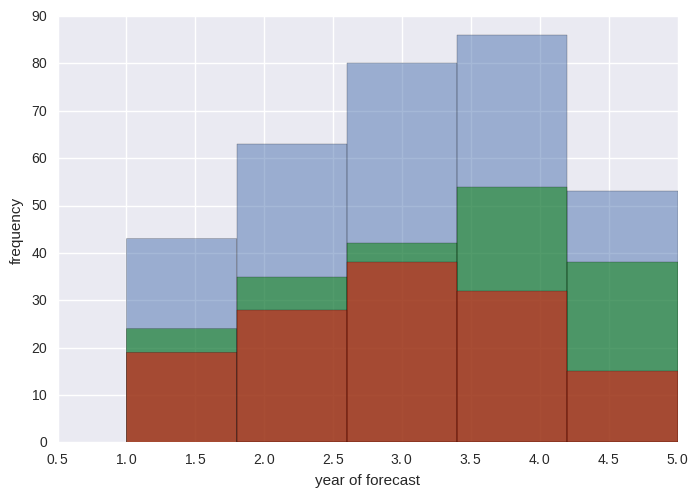

In [97]:
plt.hist(pos_years, bins=5, alpha=0.5)
plt.hist(true_pos_years, bins=5, alpha=0.5, color='g')
plt.hist(false_neg_years, bins=5, alpha=0.5, color='r')
plt.xlabel('year of forecast')
plt.ylabel('frequency')